# 1 - Introdução

Quem nunca notou como as músicas que ouvimos no modo aleatório em aplicativos de música parecem estar longe de ser aleatórias? Já pensou como um aplicativo pode nos recomendar uma música com tanta precisão? E não é só com apps de música ou streaming; até em vídeos, como quando um serviço sugere “Se você gostou deste filme, talvez goste de outros” ou o YouTube oferece “Vídeos relacionados ao lado”.

Como esses algoritmos funcionam? Como eles definem e geram essas recomendações? Nesta aula, vamos explorar como construir um sistema de recomendação de músicas utilizando coletados a partir de uma API disponibilizado pelo Spotify.




[Spotify API](https://developer.spotify.com/documentation/web-api/reference/#/operations/get-several-audio-features)

## 1.1 Dicionário dos dados

Os dados necessários para desenvolver todo o nosso trabalho foram retirados da API do Spotify e já foram previamente tratados.

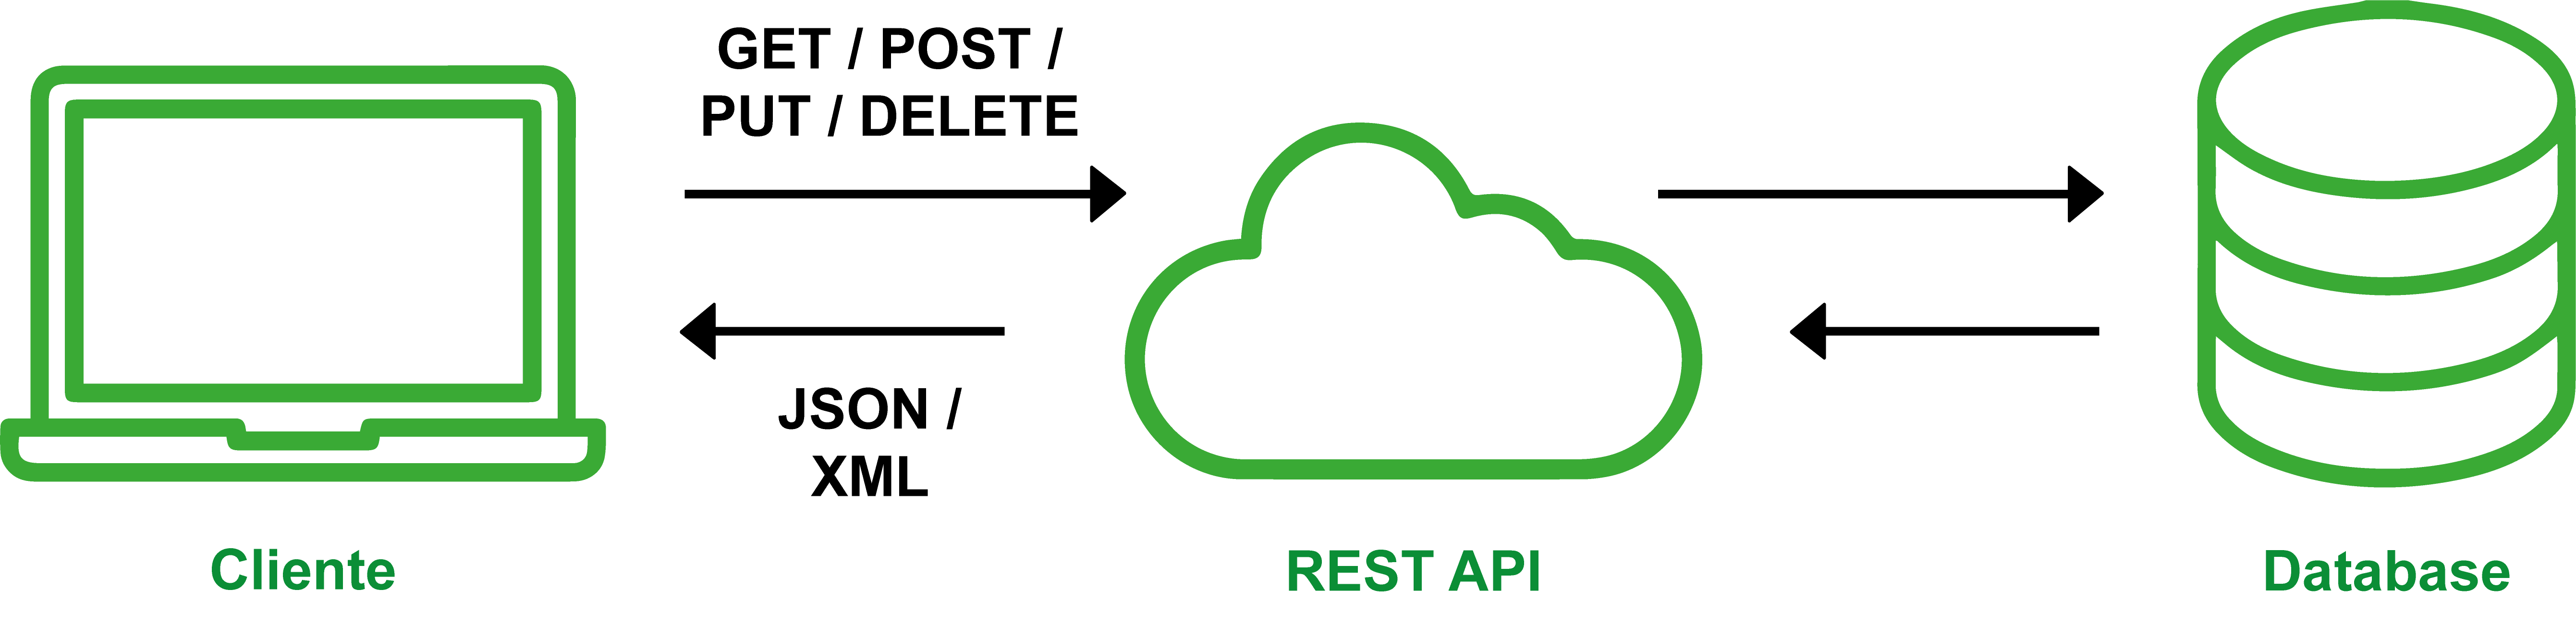

É importante conhecer o básico sobre os conceitos de retirada dos dados. API é a abreviação para Application Programming Interface, que em uma tradução livre pode ser Interface de Programação de Aplicação. Ela funciona como um atalho para o banco de dados, com uma série de padrões e protocolos e a API do Spotify funciona utilizando os princípios REST, que nos retornam arquivos json com os metadados das informações requeridas, como artista, música, álbum e faixa, que são retirados diretamente do catálogo do Spotify.



* `Acousticness/Acústica:` Variável numérica, medida de confiança de 0,0 a 1,0 se a faixa é acústica. 1.0 representa alta confiança de que a faixa é acústica.

* `Danceability/Dançabilidade:` Variável numérica, a dançabilidade descreve o quão adequada uma faixa é para dançar com base em uma combinação de elementos musicais, incluindo tempo, estabilidade do ritmo, força da batida e regularidade geral. Um valor de 0,0 é o menos dançável e 1,0 é o mais dançável.

* `Duration_ms:`Variável numérica, a duração da trilha em milissegundos.

* `Duration_min:` Variável numérica, a duração da faixa em minutos.

* `Energy/Energia:` Variável numérica, Energia é uma medida de 0,0 a 1,0 e representa uma medida perceptiva de intensidade e atividade. Normalmente, as faixas energéticas parecem rápidas, altas e barulhentas. Por exemplo, o death metal tem alta energia, enquanto um prelúdio de Bach tem uma pontuação baixa na escala. As características perceptivas que contribuem para este atributo incluem faixa dinâmica, intensidade percebida, timbre, taxa de início e entropia geral.

* `Explicit/Explícito:` Variável categórica, se a faixa tem ou não letras explícitas (verdadeiro = sim (1); falso = não(0), não OU desconhecido).

* `Id:` O ID do Spotify para a faixa.

* `Instrumentalness/Instrumentalidade:` Variável numérica, prevê se uma faixa não contém vocais. Os sons “Ooh” e “aah” são tratados como instrumentais neste contexto. Faixas de rap ou de palavras faladas são claramente “vocais”. Quanto mais próximo o valor de instrumentalidade estiver de 1,0, maior a probabilidade de a faixa não conter conteúdo vocal. Valores acima de 0,5 destinam-se a representar faixas instrumentais, mas a confiança é maior à medida que o valor se aproxima de 1,0.

* `Key/Chave:`Variável numérica, a chave geral estimada da faixa. Os inteiros são mapeados para pitchs usando a notação padrão de Pitch Class. Por exemplo. 0 = C, 1 = C#/Db, 2 = D, e assim por diante. Se nenhuma chave foi detectada, o valor é -1.

* `Liveness/ Ao vivo:` Variável numérica, detecta a presença de um público na gravação. Valores mais altos de vivacidade representam uma probabilidade maior de que a faixa tenha sido executada ao vivo. Um valor acima de 0,8 fornece uma forte probabilidade de que a faixa esteja ativa.

* `Loudness/ Volume em dB:` Variável numérica, volume geral de uma faixa em decibéis (dB). Os valores de volume são calculados em média em toda a faixa e são úteis para comparar o volume relativo das faixas. A sonoridade é a qualidade de um som que é o principal correlato psicológico da força física (amplitude). Os valores típicos variam entre -60 e 0 db.

* `Mode/ Modo:` Variável numérica, o modo indica a modalidade (maior ou menor) de uma faixa, o tipo de escala da qual seu conteúdo melódico é derivado. Maior é representado por 1 e menor é 0.

* `Popularity/Popularidade:` Variável numérica, a popularidade de uma faixa é um valor entre 0 e 100, sendo 100 o mais popular. A popularidade é calculada por algoritmo e é baseada, em grande parte, no número total de execuções que a faixa teve e quão recentes são essas execuções.

* `Speechiness/Fala:` Variável numérica, a fala detecta a presença de palavras faladas em uma faixa. Quanto mais exclusivamente falada a gravação (por exemplo, talk show, audiolivro, poesia), mais próximo de 1,0 o valor do atributo. Valores acima de 0,66 descrevem faixas que provavelmente são feitas inteiramente de palavras faladas. Valores entre 0,33 e 0,66 descrevem faixas que podem conter música e fala, seja em seções ou em camadas, incluindo casos como música rap. Os valores abaixo de 0,33 provavelmente representam músicas e outras faixas que não são de fala.

* `Tempo:` Variável numérica, Tempo estimado geral de uma faixa em batidas por minuto (BPM). Na terminologia musical, tempo é a velocidade ou ritmo de uma determinada peça e deriva diretamente da duração média da batida.

* `Valence/Valência:` Variável numérica, Medida de 0,0 a 1,0 descrevendo a positividade musical transmitida por uma faixa. Faixas com alta valência soam mais positivas (por exemplo, feliz, alegre, eufórica), enquanto faixas com baixa valência soam mais negativas (por exemplo, triste, deprimida, irritada).

* `Year/Ano:` Ano em que a música foi lançada.

## 1.2 Analise dos dados

### Importando e vizualindo dados

Obs.: crie um repositório no seu github (dados_totais, dados_generos e dados_anos)

In [2]:
import sklearn.metrics as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.neighbors as ng
import sklearn.model_selection as ms
import sklearn.cluster as cluster
import plotly.graph_objects as go
import plotly.express as px
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder

In [3]:
# Importe o conjunto de dados
url1 = "https://raw.githubusercontent.com/lorranmendes22/Cluster/main/Dados_totais.csv"
dftotais = pd.read_csv(url1)

# Exiba as primeiras linhas do DataFrame
dftotais.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,artists_song
0,0.285,2000,0.00239,Coldplay,0.429,266773,0.661,0,3AJwUDP919kvQ9QcozQPxg,0.000121,11,0.2340,-7.227,1,Yellow,84,0.0281,173.372,Coldplay - Yellow
1,0.613,2000,0.14300,OutKast,0.843,270507,0.806,1,0I3q5fE6wg7LIfHGngUTnV,0.000000,4,0.0771,-5.946,0,Ms. Jackson,80,0.2690,94.948,OutKast - Ms. Jackson
2,0.400,2000,0.00958,Linkin Park,0.556,216880,0.864,0,60a0Rd6pjrkxjPbaKzXjfq,0.000000,3,0.2090,-5.870,0,In the End,84,0.0584,105.143,Linkin Park - In the End
3,0.543,2000,0.00664,3 Doors Down,0.545,233933,0.865,0,6ZOBP3NvffbU4SZcrnt1k6,0.000011,11,0.1680,-5.708,0,Kryptonite,78,0.0286,99.009,3 Doors Down - Kryptonite
4,0.760,2000,0.03020,Eminem,0.949,284200,0.661,1,3yfqSUWxFvZELEM4PmlwIR,0.000000,5,0.0454,-4.244,0,The Real Slim Shady,80,0.0572,104.504,Eminem - The Real Slim Shady


In [4]:
import pandas as pd

# Importe o conjunto de dados
url2 = "https://raw.githubusercontent.com/lorranmendes22/Cluster/main/data_by_year.csv"
dfano = pd.read_csv(url2)

# Exiba as primeiras linhas do DataFrame
dfano.head()

,mode,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,1921,0.886896,0.418597,260537.1667,0.231815,0.344878,0.205710,-17.048667,0.073662,101.531493,0.379327,0.653333,2
1,1,1922,0.938592,0.482042,165469.7465,0.237815,0.434195,0.240720,-19.275282,0.116655,100.884521,0.535549,0.140845,10
2,1,1923,0.957247,0.577341,177942.3622,0.262406,0.371733,0.227462,-14.129211,0.093949,114.010730,0.625492,5.389189,0
3,1,1924,0.940200,0.549894,191046.7076,0.344347,0.581701,0.235219,-14.231343,0.092089,120.689572,0.663725,0.661017,10
4,1,1925,0.962607,0.573863,184986.9245,0.278594,0.418297,0.237668,-14.146414,0.111918,115.521921,0.621929,2.604317,5


In [5]:
import pandas as pd

# Importe o conjunto de dados
url3 = "https://raw.githubusercontent.com/lorranmendes22/Cluster/main/data_by_genres.csv"
dfgenero = pd.read_csv(url3)

# Exiba as primeiras linhas do DataFrame
dfgenero.head()

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,1,8-bit,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
3,1,[],0.651417,0.529093,2.328809e+05,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882,7
4,1,a cappella,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7


### Verificando o tipo dos dados e seus valores

In [ ]:
# Verificando o tipo dos dados e seus valores do dftotais
dftotais.info()
dftotais.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20311 entries, 0 to 20310
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   valence           20311 non-null  float64
 1   year              20311 non-null  int64  
 2   acousticness      20311 non-null  float64
 3   artists           20311 non-null  object 
 4   danceability      20311 non-null  float64
 5   duration_ms       20311 non-null  int64  
 6   energy            20311 non-null  float64
 7   explicit          20311 non-null  int64  
 8   id                20311 non-null  object 
 9   instrumentalness  20311 non-null  float64
 10  key               20311 non-null  int64  
 11  liveness          20311 non-null  float64
 12  loudness          20311 non-null  float64
 13  mode              20311 non-null  int64  
 14  name              20311 non-null  object 
 15  popularity        20311 non-null  int64  
 16  speechiness       20311 non-null  float6

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
count,20311.000000,20311.000000,20311.000000,20311.000000,2.031100e+04,20311.000000,20311.000000,20311.000000,20311.000000,20311.000000,20311.000000,20311.000000,20311.000000,20311.000000,20311.000000
mean,0.481928,2010.183201,0.242799,0.587702,2.286290e+05,0.650766,0.279504,0.060173,5.239673,0.194004,-7.083095,0.659052,56.441879,0.100602,122.074260
std,0.246413,6.063968,0.284416,0.171322,7.046523e+04,0.221774,0.448766,0.199315,3.583479,0.157758,4.320102,0.474040,11.560951,0.106060,30.865188
min,0.000000,2000.000000,0.000000,0.000000,3.030100e+04,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000
25%,0.288000,2005.000000,0.016700,0.477000,1.920000e+05,0.516000,0.000000,0.000000,2.000000,0.097600,-8.110000,0.000000,48.000000,0.035700,96.117500
50%,0.472000,2010.000000,0.114000,0.596000,2.216270e+05,0.680000,0.000000,0.000002,5.000000,0.128000,-6.072000,1.000000,56.000000,0.052400,120.109000
75%,0.672000,2015.000000,0.395000,0.714000,2.561330e+05,0.826000,1.000000,0.000512,8.000000,0.248000,-4.629500,1.000000,64.000000,0.116000,143.667500
max,1.000000,2020.000000,0.996000,0.986000,2.558287e+06,0.999000,1.000000,1.000000,11.000000,0.997000,1.483000,1.000000,100.000000,0.950000,220.099000


In [ ]:
# Verificando o tipo dos dados e seus valores do dfano
dfano.info()
dfano.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              100 non-null    int64  
 1   year              100 non-null    int64  
 2   acousticness      100 non-null    float64
 3   danceability      100 non-null    float64
 4   duration_ms       100 non-null    float64
 5   energy            100 non-null    float64
 6   instrumentalness  100 non-null    float64
 7   liveness          100 non-null    float64
 8   loudness          100 non-null    float64
 9   speechiness       100 non-null    float64
 10  tempo             100 non-null    float64
 11  valence           100 non-null    float64
 12  popularity        100 non-null    float64
 13  key               100 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 11.1 KB


,mode,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
count,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0000
mean,1.0,1970.500000,0.556317,0.536783,227296.752234,0.452705,0.193582,0.208224,-11.969054,0.105861,116.015674,0.532120,27.376065,3.7900
std,0.0,29.011492,0.275358,0.052356,25630.048065,0.161738,0.122488,0.017903,3.105610,0.082128,5.669645,0.057809,20.703197,3.5627
min,1.0,1921.000000,0.219931,0.414445,156881.657475,0.207948,0.016376,0.168450,-19.275282,0.049098,100.884521,0.379327,0.140845,0.0000
25%,1.0,1945.750000,0.289516,0.500800,210889.193536,0.280733,0.103323,0.197509,-14.189232,0.064244,111.718626,0.497174,3.298200,0.0000
50%,1.0,1970.500000,0.459190,0.540976,235520.850833,0.495997,0.127644,0.206074,-11.773061,0.085763,117.455548,0.541503,33.619250,2.0000
75%,1.0,1995.250000,0.856711,0.570948,247702.738058,0.598008,0.276707,0.218493,-9.950542,0.104438,120.606644,0.570080,44.943375,7.0000
max,1.0,2020.000000,0.962607,0.692904,267677.823086,0.681778,0.581701,0.264335,-6.595067,0.490001,124.283129,0.663725,65.256542,10.0000


In [ ]:
# Verificando o tipo dos dados e seus valores do dfgenero
dfgenero.info()
dfgenero.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2973 entries, 0 to 2972
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              2973 non-null   int64  
 1   genres            2973 non-null   object 
 2   acousticness      2973 non-null   float64
 3   danceability      2973 non-null   float64
 4   duration_ms       2973 non-null   float64
 5   energy            2973 non-null   float64
 6   instrumentalness  2973 non-null   float64
 7   liveness          2973 non-null   float64
 8   loudness          2973 non-null   float64
 9   speechiness       2973 non-null   float64
 10  tempo             2973 non-null   float64
 11  valence           2973 non-null   float64
 12  popularity        2973 non-null   float64
 13  key               2973 non-null   int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 325.3+ KB


,mode,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
count,2973.000000,2973.000000,2973.000000,2.973000e+03,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000
mean,0.833165,0.401241,0.537187,2.517209e+05,0.561143,0.211366,0.192800,-10.509848,0.083588,119.018723,0.492748,39.919185,5.938782
std,0.372891,0.319760,0.150668,9.465686e+04,0.234486,0.267329,0.092356,5.369202,0.080483,17.469188,0.201820,16.748723,3.368110
min,0.000000,0.000003,0.056900,3.094600e+04,0.001002,0.000000,0.022200,-41.825000,0.023800,47.135722,0.003353,0.000000,0.000000
25%,1.000000,0.119050,0.441202,2.063788e+05,0.395058,0.004835,0.137687,-12.427656,0.044900,109.198143,0.348578,32.491279,3.000000
50%,1.000000,0.321745,0.546496,2.375453e+05,0.601195,0.080700,0.178764,-9.221817,0.059457,119.194167,0.500048,43.056569,7.000000
75%,1.000000,0.673991,0.647500,2.772720e+05,0.730127,0.343333,0.220856,-6.920125,0.091000,127.508750,0.640257,51.138889,9.000000
max,1.000000,0.996000,0.929000,2.382587e+06,0.994667,0.992000,0.960000,0.060000,0.946219,204.212000,0.980000,80.666667,11.000000


In [ ]:
dftotais["year"].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

In [ ]:
dftotais.shape

(20311, 19)

In [ ]:
dftotais = dftotais.drop(['explicit', 'key', 'mode', 'id'], axis=1)
dftotais.head(2)

,valence,year,acousticness,artists,danceability,duration_ms,energy,instrumentalness,liveness,loudness,name,popularity,speechiness,tempo,artists_song
0,0.285,2000,0.00239,Coldplay,0.429,266773,0.661,0.000121,0.2340,-7.227,Yellow,84,0.0281,173.372,Coldplay - Yellow
1,0.613,2000,0.14300,OutKast,0.843,270507,0.806,0.000000,0.0771,-5.946,Ms. Jackson,80,0.2690,94.948,OutKast - Ms. Jackson


In [ ]:
dfano = dfano.drop(['key', 'mode'], axis=1)
dfano.head(2)

,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
0,1921,0.886896,0.418597,260537.166667,0.231815,0.344878,0.20571,-17.048667,0.073662,101.531493,0.379327,0.653333
1,1922,0.938592,0.482042,165469.746479,0.237815,0.434195,0.24072,-19.275282,0.116655,100.884521,0.535549,0.140845


In [ ]:
dfgenero = dfgenero.drop(['key', 'mode'], axis=1)
dfgenero.head(2)

,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
0,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.3616,-31.514333,0.040567,75.336500,0.103783,27.833333
1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.1310,-16.854000,0.076817,120.285667,0.221750,52.500000


### Verificando a existência de dados Null e NaN

In [ ]:
# Verificando a existência de dados Null e NaN no dftotais
dftotais.isnull().sum()
dftotais.isna().sum()

,0
valence,0
year,0
acousticness,0
artists,0
danceability,0
duration_ms,0
energy,0
instrumentalness,0
liveness,0
loudness,0


In [ ]:
# Verificando a existência de dados Null e NaN no dfano
dfano.isnull().sum()
dfano.isna().sum()

,0
year,0
acousticness,0
danceability,0
duration_ms,0
energy,0
instrumentalness,0
liveness,0
loudness,0
speechiness,0
tempo,0


In [ ]:
# Verificando a existência de dados Null e NaN no dfgenero
dfgenero.isnull().sum()
dfgenero.isna().sum()

,0
genres,0
acousticness,0
danceability,0
duration_ms,0
energy,0
instrumentalness,0
liveness,0
loudness,0
speechiness,0
tempo,0


## 1.3 Análise gráfica

*   List item
*   List item



### Análise temporal (dados_anos)

Use o código seguinte para plotar a variação de algumas features ao longo dos anos.



```
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Scatter(x=dados_anos['year'], y=dados_anos['acousticness'],
                    name='Acousticness'))
fig.add_trace(go.Scatter(x=dados_anos['year'], y=dados_anos['valence'],
                    name='Valence'))
fig.add_trace(go.Scatter(x=dados_anos['year'], y=dados_anos['danceability'],
                    name='Danceability'))
fig.add_trace(go.Scatter(x=dados_anos['year'], y=dados_anos['energy'],
                    name='Energy'))
fig.add_trace(go.Scatter(x=dados_anos['year'], y=dados_anos['instrumentalness'],
                    name='Instrumentalness'))
fig.add_trace(go.Scatter(x=dados_anos['year'], y=dados_anos['liveness'],
                    name='Liveness'))
fig.add_trace(go.Scatter(x=dados_anos['year'], y=dados_anos['speechiness'],
                    name='Speechiness'))

fig.show()

```

In [ ]:
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Scatter(x=dfano['year'], y=dfano['acousticness'],
                    name='Acousticness'))
fig.add_trace(go.Scatter(x=dfano['year'], y=dfano['valence'],
                    name='Valence'))
fig.add_trace(go.Scatter(x=dfano['year'], y=dfano['danceability'],
                    name='Danceability'))
fig.add_trace(go.Scatter(x=dfano['year'], y=dfano['energy'],
                    name='Energy'))
fig.add_trace(go.Scatter(x=dfano['year'], y=dfano['instrumentalness'],
                    name='Instrumentalness'))
fig.add_trace(go.Scatter(x=dfano['year'], y=dfano['liveness'],
                    name='Liveness'))
fig.add_trace(go.Scatter(x=dfano['year'], y=dfano['speechiness'],
                    name='Speechiness'))

fig.show()

### Análise de Correlação de Features



```
import plotly.express as px
fig = px.imshow(dados_gerais.drop(['artists', 'id', 'name', 'artists_song'],axis=1).corr(), text_auto=True)
fig.show()
```


In [ ]:
import plotly.express as px
fig = px.imshow(dftotais.drop(['artists', 'name', 'artists_song'],axis=1).corr(), text_auto=True)
fig.show()

# 2 - Clusterização (agrupamento)

Quando lidamos com um problema de agrupamento, queremos usar um algoritmo que descubra grupos significativos nos dados, como é o nosso caso, queremos criar agrupamentos de músicas. Seja para qualquer outro fim, o algoritmo descobre os grupos sem intervenções externas, já que não precisa de rótulos para realizar previsões.

Um algoritmo clássico de clusterização é o K-means, que tenta organizar os dados em um número k de clusters (grupos), que definimos iicialmente, e, a partir disso, ele identifica os pontos de dados semelhantes e vai criando agrupamentos, tentando distanciar cada cluster o máximo possível. O cálculo das semelhanças é feito utilizando a distância euclidiana ou uma linha reta comum entre dois pontos. Quanto menor a distância euclidiana, mais próximo os dois pontos estão e mais semelhantes eles são por consequência.

O processo de como o K-means funciona é relativamente simples e repetitivo.

1.  O usuário define o valor de clusters (k);
2.  O K-means seleciona um ponto aleatório para cada centróide, temos k-centróides nesse ponto, e um centróide é o ponto em torno do qual cada cluster é construído;
3. A distância euclidiana é calculada entre cada ponto e cada centróide, e, a partir disto, cada ponto será atribuído a um centróide (mais próximo com base na distância euclidiana);
4. O algoritmo calcula a média da distância euclidiana entre cada ponto do cluster e o centróide para definir um novo centróide;
5. O processo 4 se repete até que os centróides dos clusters não se movam mais.

Veja a uma animação de como esse processo acontece no [K-Means Clustering Demo.](https://user.ceng.metu.edu.tr/~akifakkus/courses/ceng574/k-means/)


## 2 - Clusterização por gênero

In [ ]:
#visualize o dataset dados_genero

In [ ]:
dfgenero.head()

,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
0,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333
1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000
2,8-bit,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000
3,[],0.651417,0.529093,2.328809e+05,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882
4,a cappella,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071


### 2.1 PCA e SdandardScaler

O K-means não consegue resolver problemas com escalas diferentes e também não consegue agrupar com precisão dados de alta dimensionalidade (muitas features)

Para a primeira parte, em relação às escalas, é necessário que todos estejam na mesma escala de [0,1], caso contrário, ele colocará maior peso em variáveis que têm variâncias maiores e esses recursos terão maior influência na forma final do cluster.

Em relação à alta dimensionalidade, o algoritmo usa a distância euclidiana para determinar a associação de agrupamento, porém, quando temos uma alta dimensionalidade, pares de pontos começarão a ter distâncias muito semelhantes e não conseguiremos obter agrupamentos significativos. Para reduzir a quantidade de dados podemos utilizar a técnica chamada Análise de Componentes Principais (PCA).

PCA é um método clássico usado para reduzir dados de alta dimensionalidade para um espaço de baixa dimensão. Em outras palavras, simplesmente não podemos visualizar com precisão conjuntos de dados de alta dimensão, porque não podemos visualizar nada acima de 3 dimensões (3D). Um dos principais objetivos do PCA é transformar conjuntos de dados com mais de 3 dimensões (alta dimensão) em gráficos tipicamente 2D ou 3D. Essa ação é o que chamamos de espaço de baixa dimensão.

Mesmo fazendo toda a redução de n dimensões existentes para 2D, no nosso caso, ainda conseguimos reter a maior parte da informação necessária do conjunto de dados de alta dimensão, ou seja, a informação foi “espremida” até caber em 2 dimensões.

Então, as informações que eram contidas em n dimensões passam a estar em 2 componentes principais (PC). O primeiro PC contém a maioria das informações dos recursos originais, o segundo PC conterá a próxima maior quantidade de informações, e, caso tivéssemos mais PC 's, seria essa mesma sequência, sendo os PC’s não correlacionados entre si, o que significa que cada um guarda informações únicas.

Usando os dois módulos de auxílio, a padronização dos dados com o StandardScaler e a redução de dimensionalidade com o PCA, quando necessário, os resultados obtidos com o K-Means serão melhores do que apenas aplicar ele diretamente nos dados.

#### Pipeline

Agora vamos utilizar vários conceitos em um processo de pipeline. Então a primeira coisa que vamos fazer é importar o método **Pipeline** do [sklearn.pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) e esse método faz literalmente uma pipeline de machine learning, mas de uma forma automática, onde aplica sequencialmente uma lista de transformações até um resultado final. Então o que precisamos passar é o que a nossa pipeline vai fazer, como o primeiro passo e o que queremos de resultado final dela.

Neste ponto precisamos reduzir a dimensionalidade da tabela que está com várias colunas, porém se utilizarmos um processo de redução diretamente, sem fazer a padronização dos dados na parte de pré processamento, os resultados ficarão totalmente desbalanceados, trazendo maior peso para as variáveis que têm uma amplitude maior, como por exemplo o loudness em relação às outras variáveis que compõem a música.

Para resolver esse problema, o primeiro passo da pipeline vai ser usar o [**StandardScaler**](https://scikit-learn.org/stable/modules/preprocessing.html) para trazer essa padronização e redução de escala para que no próximo passo seja feita a redução de dimensionalidade com um método de decomposição, no nosso caso vamos escolher o
PCA.

PCA significa Análise de componentes principais e ele trás consigo uma série de análises matemáticas que são feitas para que possamos transformar aquelas milhares de colunas que temos em uma quantidade menor, com um valor n que escolhermos, porém, quanto mais colunas a gente tem no dataset original e menos colunas queremos no dataset final, o aprendizado depois pode ser prejudicado.

Na parte **n_components** podemos colocar a quantidade de % de explicação que queremos que o algoritmo tenha no final, como por exemplo 0.3, que seria 30%, ou um valor como por exemplo um valor X de colunas.


Depois de feita a pipeline, vamos salvar em um arquivo chamado projection, com as colunas x e y, que são as posições dos pontos na cluster.


```
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

SEED = 1224
np.random.seed(1224)

pca_pipeline = Pipeline([('scaler', StandardScaler()), ('PCA', PCA(n_components=2, random_state=SEED))])
genre_embedding_pca = pca_pipeline.fit_transform(dados_generos.drop("genres", axis=1))
projection = pd.DataFrame(columns=['x', 'y'], data=genre_embedding_pca)
projection

```



In [ ]:
#execute o código acima

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

SEED = 1224
np.random.seed(1224)

pca_pipeline = Pipeline([('scaler', StandardScaler()), ('PCA', PCA(n_components=2, random_state=SEED))])
genre_embedding_pca = pca_pipeline.fit_transform(dfgenero.drop("genres", axis=1))
projection = pd.DataFrame(columns=['x', 'y'], data=genre_embedding_pca)
projection

,x,y
0,5.910268,-0.011146
1,2.787093,4.498483
2,-0.757538,-1.258495
3,1.020521,-0.931690
4,0.753911,-0.999861
...,...,...
2968,-0.475136,-0.017126
2969,-3.026756,-1.304983
2970,-0.832511,-1.089726
2971,1.774790,-3.695233


In [ ]:
fig = px.scatter(projection, x='x', y='y', color=dfgenero['genres'])
fig.show()

2.2 K-Means

Depois que já fizemos a padronização com StandardScaler, ea redução da dimensionalidade com o PCA, precisamos entender o que aqueles dados estão nos mostrando. Então, temos todos os nossos dados com X e Y no projection, porém, o que eu faço com eles, ploto para onde, o que eles estão me mostrando?

E agora, precisamos aplicar um modelo de machine learning, porém, não temos nenhuma label, nenhum rótulo falando a qual grupo cada dado pertence. E é um pouco complicado de entendermos o que está acontecendo, não conseguimos agrupá-las sem ter esse rótulo, utilizando um método convencional, digamos assim, de machine learning, utilizando um método de classificação normal.

Então, podemos utilizar um método não supervisionado, já que os supervisionados não cabem nesse tipo de problema. Um método não supervisionado, não temos esses rótulos mesmo, só vamos passar os dados para a máquina, e ela vai nos dizer onde ela acha que cada dado se encaixa, onde eles estão mais perto, onde eles estão mais longe. E um modelo de cluster funciona da mesma forma. Então, a clusterizaçao vai agrupando os dados conforme a semelhança entre eles.



Como vamos utilizar o K-Means, a primeira coisa que vamos fazer é importá-lo da biblioteca SKLearn.  Vamos declarar kmeans_pca = KMeans(n_clusters=5, verbose=True, random_state=SEED). Dentro dos parâmetros que vamos passar, eu vou passar n_clusters=5, e verbose=True, que mostra como o algoritmo está funcionando Depois fazemos um kmeans_pca.fit(projection).

Na base dados_generos, eu quero que ele salve qual cluster cada gênero é. Então, dentro do projection, eu quero que ele faça dados_generos[‘cluster_pca’] = kmeans_pca.predict(projection), ou seja, vamos uma coluna dentro de dados_generos, chamada cluster_pca, com a identificação do cluster.Depois, vamos colocar em projection uma nova coluna chamada cluster_pca, então, além de ter o X e o Y na tabela que vamos ter, vamos ter uma nova coluna chamada cluster_pca



```
from sklearn.cluster import KMeans

kmeans_pca = KMeans(n_clusters=5, verbose=True, random_state=SEED)

kmeans_pca.fit(projection)

dados_generos['cluster_pca'] = kmeans_pca.predict(projection)
projection['cluster_pca'] = kmeans_pca.predict(projection)

```

Vamos também salvar dentro do projection uma coluna chamada generos, para ficar masi fácil de identificar a qual cluster pertence cada gênero


```
# projection['generos'] = dados_generos['genres']
```



In [ ]:
from sklearn.cluster import KMeans

kmeans_pca = KMeans(n_clusters=5, verbose=True, random_state=SEED)
kmeans_pca.fit(projection)
dfgenero['cluster_pca'] = kmeans_pca.predict(projection)
projection['cluster_pca'] = kmeans_pca.predict(projection)

Initialization complete
Iteration 0, inertia 5000.532543302807.
Iteration 1, inertia 4285.813443543616.
Iteration 2, inertia 4040.1195940668426.
Iteration 3, inertia 3849.638983978738.
Iteration 4, inertia 3731.297392611515.
Iteration 5, inertia 3667.037077296709.
Iteration 6, inertia 3617.4299326062223.
Iteration 7, inertia 3581.4297688804436.
Iteration 8, inertia 3561.6098583117787.
Iteration 9, inertia 3550.955372011108.
Iteration 10, inertia 3546.8630032705573.
Iteration 11, inertia 3544.17793277058.
Iteration 12, inertia 3543.176644108008.
Iteration 13, inertia 3542.3996086869033.
Iteration 14, inertia 3541.752700084072.
Iteration 15, inertia 3541.189942765324.
Iteration 16, inertia 3540.0611757669553.
Iteration 17, inertia 3538.720215348729.
Iteration 18, inertia 3536.8541061754377.
Iteration 19, inertia 3535.349732604146.
Iteration 20, inertia 3533.796551338103.
Iteration 21, inertia 3530.6877510802324.
Iteration 22, inertia 3526.5591536730058.
Iteration 23, inertia 3522.5268761

In [ ]:
projection['generos'] = dfgenero['genres']

In [ ]:
projection

,x,y,cluster_pca,generos
0,5.910268,-0.011146,2,21st century classical
1,2.787093,4.498483,2,432hz
2,-0.757538,-1.258495,3,8-bit
3,1.020521,-0.931690,0,[]
4,0.753911,-0.999861,0,a cappella
...,...,...,...,...
2968,-0.475136,-0.017126,4,zolo
2969,-3.026756,-1.304983,3,zouglou
2970,-0.832511,-1.089726,3,zouk
2971,1.774790,-3.695233,0,zurich indie


### 2.3 Plotando a clustering



```
fig = px.scatter(
   projection, x='x', y='y', color='cluster_pca', hover_data=['x', 'y', 'generos'])
fig.show()
```





In [ ]:
fig = px.scatter(
   projection, x='x', y='y', color='cluster_pca', hover_data=['x', 'y', 'generos'])
fig.show()

### 2.4 Avaliando

Uma forma de avaliarmos se a cluster foi bem separada ou não, é utilizarmos um 'explained variance do PCA', para vermos o quanto nossas variáveis estão sendo explicadas dentro dessa nossa cluster.

```
pca_pipeline[1].explained_variance_ratio_.sum()
pca_pipeline[1].explained_variance_.sum()
```






In [ ]:
pca_pipeline[1].explained_variance_ratio_.sum()
pca_pipeline[1].explained_variance_.sum()

5.421597305805698

## 2.2 - Clusterização por música

Repita as etapas anteriores para base dados_gerais. Atenção, para essa base será necessário utilizar a conversão OneHotEnconder previamente.

Utilize o onehotenconder para transormtar a coluna de 'artists' em dado numericos

In [ ]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(dtype = int)
colunas_ohe = ohe.fit_transform(dftotais[['artists']]).toarray()
dados_ohe = pd.DataFrame(colunas_ohe, columns=ohe.get_feature_names_out(['artists']))
dados_totais2 = dftotais.drop('artists', axis = 1)

dados_musicas_dummies = pd.concat(([dados_totais2, dados_ohe]), axis = 1)
dados_musicas_dummies.head()

,valence,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,name,...,artists_Zara Larsson,artists_Zedd,artists_alt-J,artists_blackbear,artists_blink-182,artists_deadmau5,artists_for KING & COUNTRY,artists_fun.,artists_girl in red,artists_iann dior
0,0.285,2000,0.00239,0.429,266773,0.661,0.000121,0.2340,-7.227,Yellow,...,0,0,0,0,0,0,0,0,0,0
1,0.613,2000,0.14300,0.843,270507,0.806,0.000000,0.0771,-5.946,Ms. Jackson,...,0,0,0,0,0,0,0,0,0,0
2,0.400,2000,0.00958,0.556,216880,0.864,0.000000,0.2090,-5.870,In the End,...,0,0,0,0,0,0,0,0,0,0
3,0.543,2000,0.00664,0.545,233933,0.865,0.000011,0.1680,-5.708,Kryptonite,...,0,0,0,0,0,0,0,0,0,0
4,0.760,2000,0.03020,0.949,284200,0.661,0.000000,0.0454,-4.244,The Real Slim Shady,...,0,0,0,0,0,0,0,0,0,0


### Padronização e Redução de dimensionalidade em pipeline

Atenção, crie um pipeline removendo as colunas:
'artists_song', 'id','name','artists_song', "explicit", "key", "mode"

In [ ]:
import pandas as pd
import numpy as np
SEED = 1224
np.random.seed(1224)

pca_pipeline = Pipeline([('scaler', StandardScaler()), ('PCA', PCA(n_components=2, random_state=SEED))])
music_embedding_pca = pca_pipeline.fit_transform(dados_musicas_dummies.drop(['artists_song','name'], axis=1))
projection_music = pd.DataFrame(columns=['x', 'y'], data=music_embedding_pca)
projection_music


,x,y
0,0.174955,0.751254
1,-1.357568,0.057624
2,-0.972200,0.654166
3,-0.927374,1.269250
4,-1.710142,-0.377069
...,...,...
20306,1.346604,-2.773569
20307,1.270021,-2.435120
20308,0.783212,-1.155496
20309,0.002563,-3.047444


### Aplicação do cluster com K-Means

In [ ]:
kmeans_pca = KMeans(n_clusters=5, verbose=True, random_state=SEED)
kmeans_pca.fit(projection_music)
projection_music['cluster_pca'] = kmeans_pca.predict(projection_music)
projection_music['artist'] = dftotais['artists']
projection_music['song'] = dftotais['artists_song']

Initialization complete
Iteration 0, inertia 37970.06135031853.
Iteration 1, inertia 29156.610875816237.
Iteration 2, inertia 28762.01415738681.
Iteration 3, inertia 28616.628999091805.
Iteration 4, inertia 28567.714002517536.
Iteration 5, inertia 28550.734291861947.
Iteration 6, inertia 28542.07115250399.
Iteration 7, inertia 28538.736033463712.
Converged at iteration 7: center shift 0.0002581783034553924 within tolerance 0.000321150082681542.
Initialization complete
Iteration 0, inertia 40858.275379834246.
Iteration 1, inertia 30134.85064298877.
Iteration 2, inertia 29072.628388774003.
Iteration 3, inertia 28777.32169078793.
Iteration 4, inertia 28653.01571366344.
Iteration 5, inertia 28602.056534274612.
Iteration 6, inertia 28573.22460986391.
Iteration 7, inertia 28559.468714995663.
Iteration 8, inertia 28552.450104636944.
Iteration 9, inertia 28547.759662470944.
Iteration 10, inertia 28544.831589782276.
Converged at iteration 10: center shift 0.0003044498224027426 within tolerance 

### Plotando o cluster

In [ ]:
fig = px.scatter(
   projection_music, x='x', y='y', color='cluster_pca', hover_data=['x', 'y', 'song'])
fig.show()


### Avaliando o cluster

# 3 - Sistemas de Recomendação

Faremos na aula de sexta! (: